# Notebook implementation


!pip install labelme tensorflow opencv-python matplotlib albumentations

In [2]:
import os
import time
import uuid
import cv2

In [9]:
os.getcwd()

'd:\\Deep Learning\\Face detection model\\notebook'

In [10]:
IMAGES_PATH = os.path.join('../data','images')
number_images = 30

In [13]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collectingh Images {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Collectingh Images 0
Collectingh Images 1
Collectingh Images 2
Collectingh Images 3
Collectingh Images 4
Collectingh Images 5
Collectingh Images 6
Collectingh Images 7
Collectingh Images 8
Collectingh Images 9
Collectingh Images 10
Collectingh Images 11
Collectingh Images 12
Collectingh Images 13
Collectingh Images 14
Collectingh Images 15
Collectingh Images 16
Collectingh Images 17
Collectingh Images 18
Collectingh Images 19
Collectingh Images 20
Collectingh Images 21
Collectingh Images 22
Collectingh Images 23
Collectingh Images 24
Collectingh Images 25
Collectingh Images 26
Collectingh Images 27
Collectingh Images 28
Collectingh Images 29


# Labeling images

In [14]:
!labelme

2024-12-08 11:47:08,925 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\radhe shayam\.labelmerc


# REVIEW DATASET

In [19]:
import tensorflow as tf
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# images = tf.data.Dataset.list_files('..\\data\\images\\*.jpg', shuffle=False)
images = tf.data.Dataset.list_files('..\\data\\images\\*.jpg', shuffle=True)

In [40]:
images.as_numpy_iterator().next()

b'..\\data\\images\\ea304d70-b52b-11ef-adf1-30050593c1b3.jpg'

In [41]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [42]:
images = images.map(load_image)

In [43]:
images.as_numpy_iterator().next()

array([[[104,  94,  84],
        [102,  92,  82],
        [101,  91,  81],
        ...,
        [193, 184, 167],
        [196, 187, 170],
        [199, 190, 173]],

       [[101,  91,  81],
        [100,  90,  80],
        [101,  91,  81],
        ...,
        [193, 184, 167],
        [195, 186, 169],
        [198, 189, 172]],

       [[103,  90,  82],
        [103,  90,  82],
        [105,  92,  83],
        ...,
        [193, 186, 168],
        [195, 188, 170],
        [196, 189, 171]],

       ...,

       [[ 67,  53,  50],
        [ 66,  52,  49],
        [ 67,  53,  50],
        ...,
        [249, 249, 255],
        [249, 249, 255],
        [248, 251, 255]],

       [[ 73,  58,  53],
        [ 71,  56,  51],
        [ 71,  56,  51],
        ...,
        [234, 235, 253],
        [236, 237, 255],
        [236, 239, 255]],

       [[ 77,  62,  57],
        [ 75,  60,  55],
        [ 73,  58,  53],
        ...,
        [190, 191, 212],
        [191, 193, 216],
        [192, 194, 217]]

### View Imgages

In [44]:
image_generator = images.batch(4).as_numpy_iterator()

In [45]:
plot_images = image_generator.next()

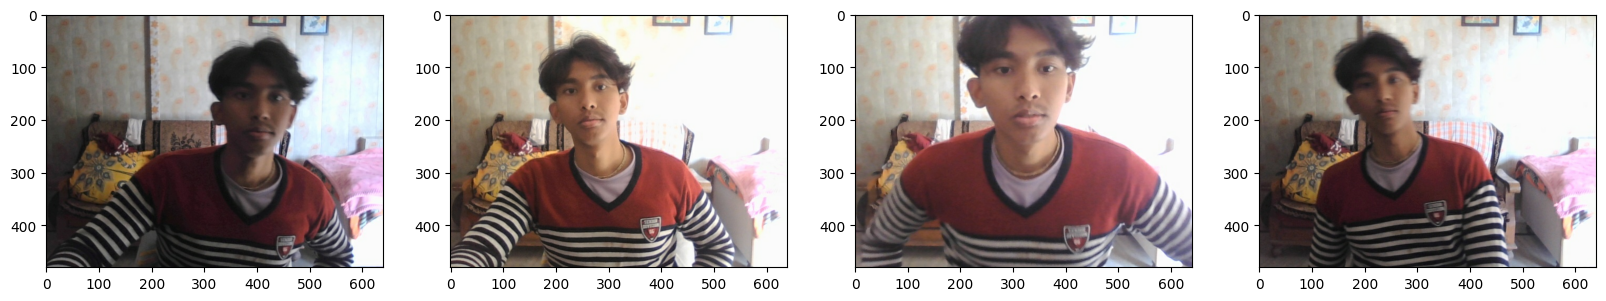

In [46]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

### Partition Unaugmented Data

#### manually split data into train test and val

In [48]:
90*.7 # 63 to train

62.99999999999999

In [51]:
90*.15 # 14 and 13 for test and val

13.5

In [53]:
import shutil

In [55]:
source_dir = '..\\data\\images\\'
train_dir = '..\\data\\train\\images\\'
test_dir = '..\\data\\test\\images\\'
val_dir = '..\\data\\val\\images\\'

# Ensure the target directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# List all image files
images = tf.io.gfile.glob(os.path.join(source_dir, '*.jpg'))

# Shuffle the images
images = tf.random.shuffle(images).numpy()

# Split the dataset
train_images = images[:63]
test_images = images[63:77]
val_images = images[77:90]

# Helper function to copy files
def copy_files(file_list, target_dir):
    for file_path in file_list:
        shutil.copy(file_path.decode('utf-8'), target_dir)  # Decode as tf returns byte strings

# Copy the files to respective folders
copy_files(train_images, train_dir)
copy_files(test_images, test_dir)
copy_files(val_images, val_dir)

print(f"{len(train_images)} images copied to Train.")
print(f"{len(test_images)} images copied to Test.")
print(f"{len(val_images)} images copied to Val.")

63 images copied to Train.
14 images copied to Test.
13 images copied to Val.


### move the matching labels

In [56]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('../data', folder, 'images')):
        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('../data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('../data', folder, 'labels', filename)
            shutil.copy(existing_filepath, new_filepath)

### Empty the main images and labels folder

In [57]:
# Paths to the directories
directories = [
    '../data/images',
    '../data/labels'
]

# Iterate through each directory and remove its contents
for directory in directories:
    if os.path.exists(directory):
        for file in os.listdir(directory):
            file_path = os.path.join(directory, file)
            try:
                # Check if it's a file or directory and remove
                if os.path.isfile(file_path) or os.path.islink(file_path):
                    os.unlink(file_path)  # Remove the file or symbolic link
                elif os.path.isdir(file_path):
                    shutil.rmtree(file_path)  # Remove the directory and its contents
            except Exception as e:
                print(f"Error removing {file_path}: {e}")

print("All specified folders have been emptied.")


All specified folders have been emptied.


### 4. Applying image augmentation on images and labels using Albumentations

In [59]:
import albumentations as alb

In [60]:
SIZE = 450

In [61]:
augmentor = alb.Compose([alb.RandomCrop(width=SIZE, height=SIZE),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                         bbox_params=alb.BboxParams(format='albumentations',
                                                    label_fields=['class_labels']))

d:\Deep Learning\Face detection model\.venv\Lib\site-packages\pydantic\main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `dict[str, any]` but got `UniformParams` with value `UniformParams(noise_type=...6, 0.0784313725490196)])` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


In [62]:
img = cv2.imread(os.path.join("../data", 'train','images',"a8cdede3-b52b-11ef-8c43-30050593c1b3.jpg"))

In [90]:
with open(os.path.join("..\\data", 'train','labels',"a8cdede3-b52b-11ef-8c43-30050593c1b3.json"),'r') as f:
    label = json.load(f)

In [91]:
label

{'version': '5.5.0',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[287.55319148936167, 62.3404255319149],
    [468.404255319149, 268.72340425531917]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '..\\images\\a8cdede3-b52b-11ef-8c43-30050593c1b3.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnL

In [92]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [93]:
coords

[287.55319148936167, 62.3404255319149, 468.404255319149, 268.72340425531917]

In [94]:
img.shape

(480, 640, 3)

In [95]:
coords = list(np.divide(coords,[640,480,640,480]))

In [96]:
coords

[np.float64(0.4493018617021276),
 np.float64(0.1298758865248227),
 np.float64(0.7318816489361704),
 np.float64(0.5598404255319149)]

#### 4.4 Apply augmentations and view results

In [97]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [108]:
augmented['image'].shape

(450, 450, 3)

In [109]:
augmented['bboxes']

[[0.3034515465630425,
  0.405059085422092,
  0.7053428310818143,
  0.8636879465315077]]

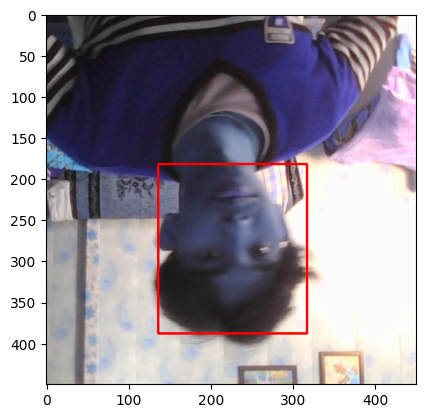

In [110]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450, 450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450, 450]).astype(int)),
                    (255,0,0), 2)

plt.imshow(augmented['image'])